In [37]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [65]:
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from termcolor import colored

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

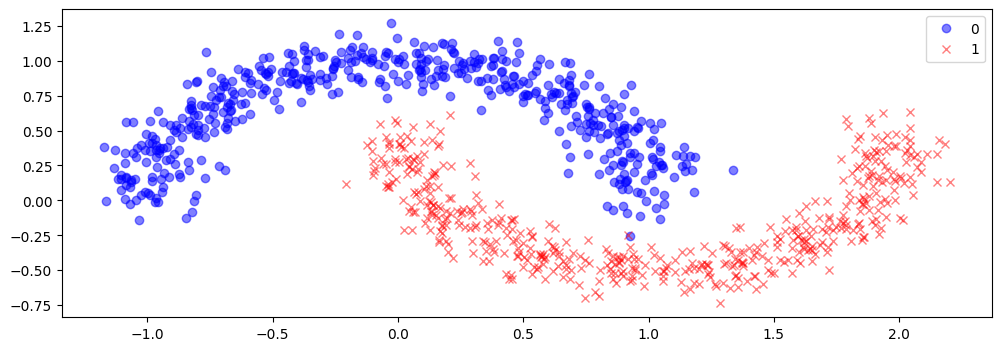

In [4]:
plt.figure(figsize=(12,4))
X, Y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[Y==0, 0], X[Y==0,1], 'ob', alpha=0.5);
plt.plot(X[Y==1, 0], X[Y==1,1], 'xr', alpha=0.5);
plt.legend(['0','1']);

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=200, verbose=0);
results = model.evaluate(X_test, Y_test)
print(colored('The Accuracy score on the Train set: ', 'blue'), results[1]) 
print(colored('Loss and Accuracy scores on the Train set: ', 'blue'), results) 

10/10 [==============================] - 0s 887us/step - loss: 0.3177 - accuracy: 0.8433
The Accuracy score on the Train set:  0.8433333039283752
Loss and Accuracy scores on the Train set:  [0.3177036941051483, 0.8433333039283752]


319/319 [==============================] - 0s 711us/step


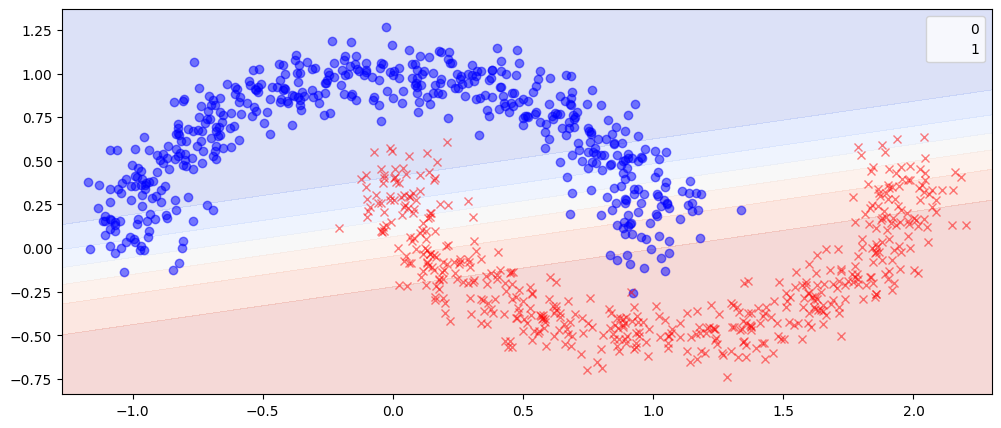

In [17]:
def plot_descision_boundary(model, X,Y):
    a_min, b_min = X.min(axis=0) - 0.1
    a_max, b_max = X.max(axis=0) + 0.1
    h_ticks = np.linspace(a_min, a_max, 101)
    v_ticks = np.linspace(b_min, b_max, 101)

    aa, bb = np.meshgrid(h_ticks,v_ticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c= model.predict(ab)
    cc= c.reshape(aa.shape)
    plt.figure(figsize=(12,5));
    plt.contourf(aa, bb, cc, cmap='coolwarm', alpha=0.2); # cmap= bwr/coolwarm/seismic
    plt.plot(X[Y==0, 0], X[Y==0,1], 'ob', alpha=0.5);
    plt.plot(X[Y==1, 0], X[Y==1,1], 'xr', alpha=0.5);
    plt.legend(['0','1']);
plot_descision_boundary(model, X, Y)

##### **Deep Model**

In [20]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, verbose=0)
model.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.0064 - accuracy: 0.9967


[0.006389472633600235, 0.996666669845581]

In [32]:
Y_train_pred = model.predict(X_train)
class_y_train = np.argmax(Y_train_pred, axis=1)
Y_test_pred = model.predict(X_test)
class_y_test = np.argmax(Y_test_pred, axis=1)
print(colored('Accuracy on the Train set:', 'blue'), accuracy_score(Y_train, class_y_train ))
print(colored('Accuracy on the Test set:', 'blue'), accuracy_score(Y_test, class_y_test))

10/10 [==============================] - 0s 968us/step
Accuracy on the Train set: 0.5185714285714286
Accuracy on the Test set: 0.45666666666666667


319/319 [==============================] - 0s 1ms/step


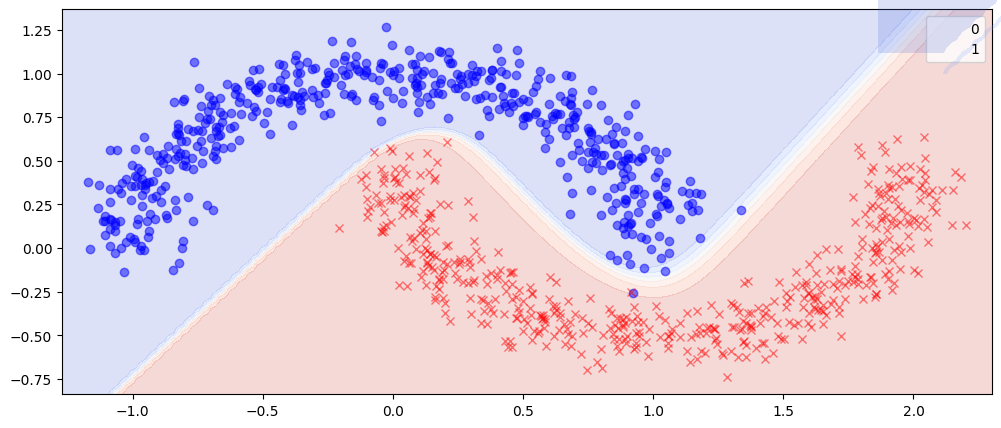

In [33]:
plot_descision_boundary(model, X, Y)

##### **Multiple Classification**

Dataset Type : <class 'sklearn.utils._bunch.Bunch'>


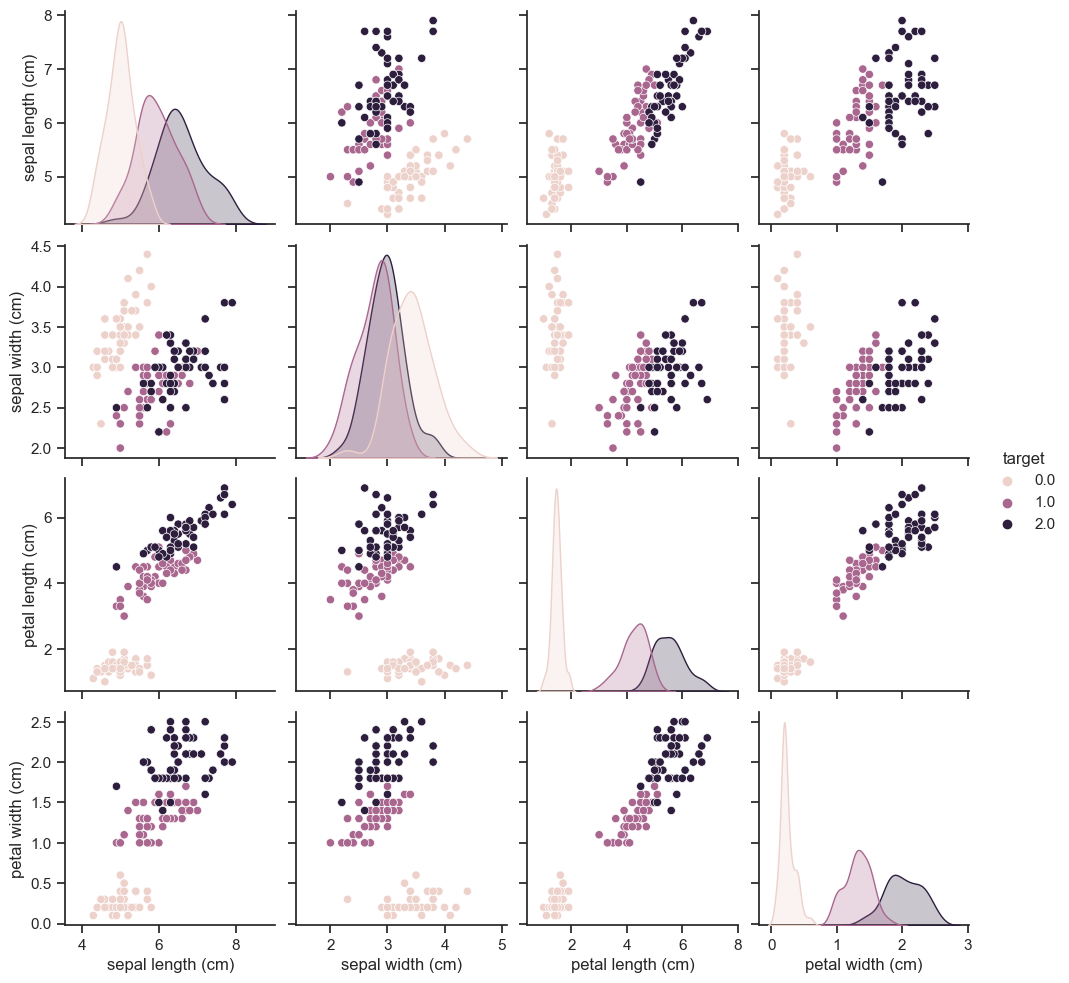

In [50]:
iris = load_iris()
print(colored('Dataset Type :', 'blue'),type(iris))
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
sns.pairplot(data, hue='target');

In [53]:
X = data.drop('target', axis=1)
Y = data['target']
Y_cat = to_categorical(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y_cat, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.1), 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=20, validation_split=0.1)
Y_pred = model.predict(X_test)

Epoch 1/20
4/4 [==============================] - 0s 49ms/step - loss: 3.0369 - accuracy: 0.0741 - val_loss: 1.4759 - val_accuracy: 0.4167
Epoch 2/20
4/4 [==============================] - 0s 11ms/step - loss: 1.3518 - accuracy: 0.5741 - val_loss: 1.0872 - val_accuracy: 0.5833
Epoch 3/20
4/4 [==============================] - 0s 14ms/step - loss: 0.7094 - accuracy: 0.6944 - val_loss: 1.3266 - val_accuracy: 0.5833
Epoch 4/20
4/4 [==============================] - 0s 12ms/step - loss: 0.9517 - accuracy: 0.6667 - val_loss: 0.8508 - val_accuracy: 0.5833
Epoch 5/20
4/4 [==============================] - 0s 13ms/step - loss: 0.6323 - accuracy: 0.6019 - val_loss: 0.9175 - val_accuracy: 0.5833
Epoch 6/20
4/4 [==============================] - 0s 12ms/step - loss: 0.5928 - accuracy: 0.7037 - val_loss: 0.6442 - val_accuracy: 0.5833
Epoch 7/20
4/4 [==============================] - 0s 13ms/step - loss: 0.4732 - accuracy: 0.6574 - val_loss: 0.6223 - val_accuracy: 0.5833
Epoch 8/20
4/4 [===========

In [58]:
Y_test_class = np.argmax(Y_test, axis=1)
Y_pred_class = np.argmax(Y_pred, axis=1)
print(colored('Classification Report:\n', 'blue' ), classification_report(Y_test_class, Y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      1.00      0.86         9
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



In [59]:
confusion_matrix(Y_test_class, Y_pred_class)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  3,  8]], dtype=int64)

##### **Exercise1**

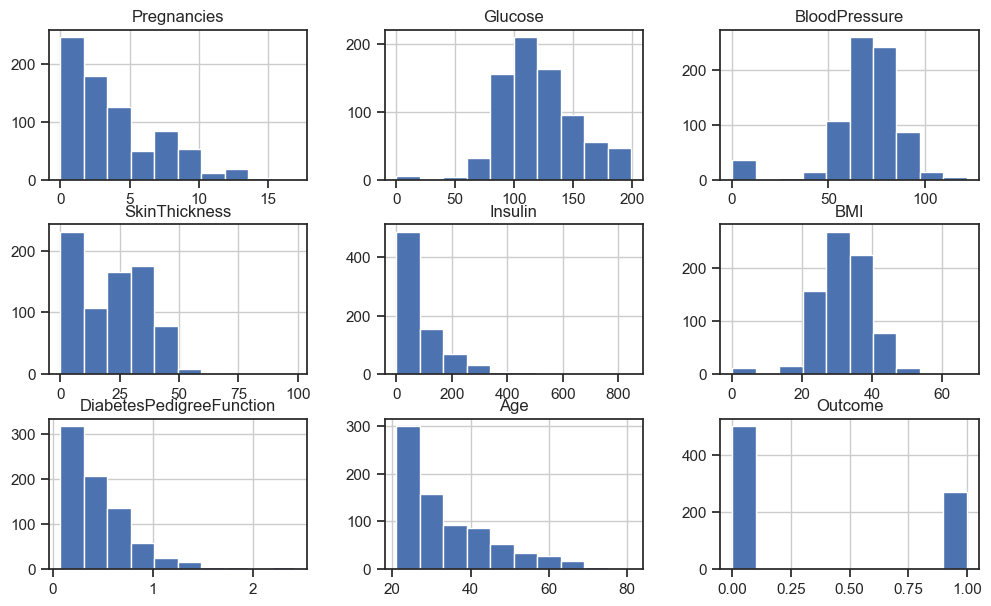

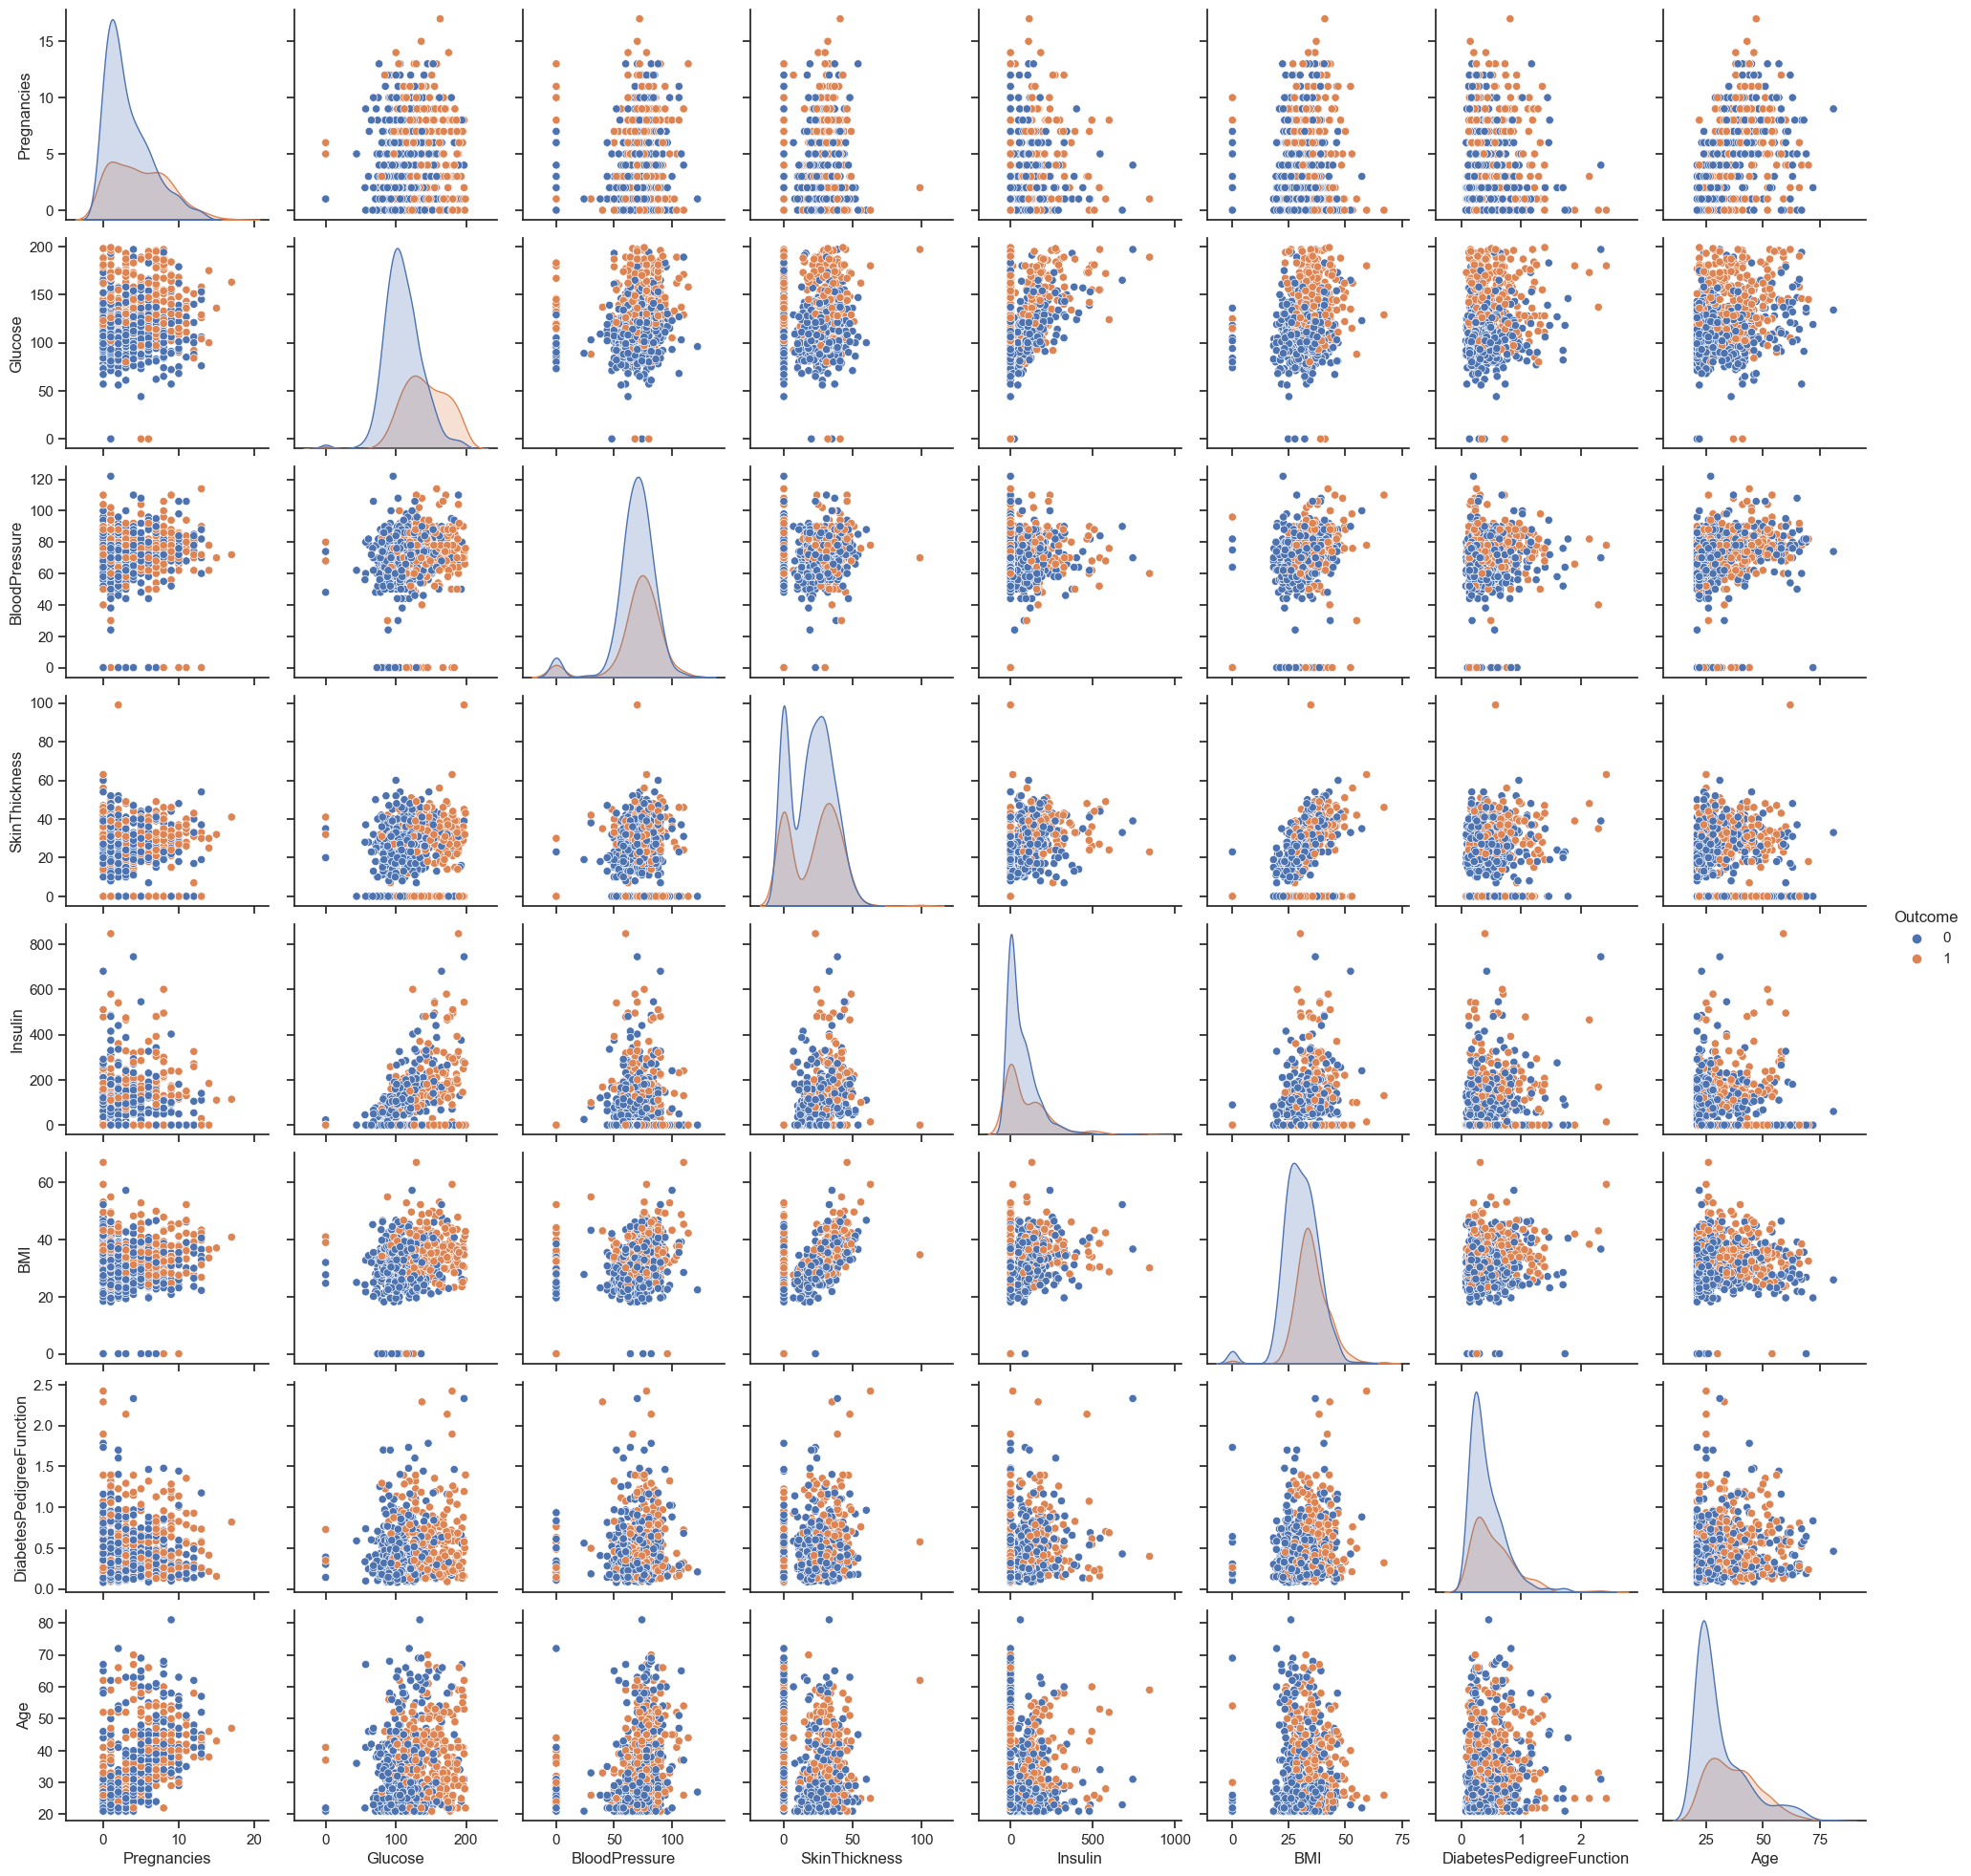

In [62]:
df = pd.read_csv(r'C:\Users\CihangirA\Desktop\CihangirA_Codes\diabetes.csv')
_ = df.hist(figsize=(12,7))
sns.pairplot(df, hue='Outcome');

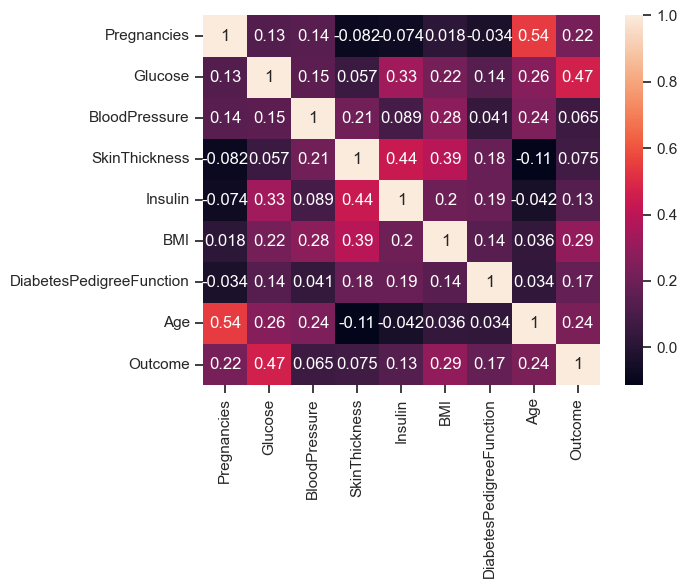

In [64]:
sns.heatmap(df.corr(), annot=True);

In [69]:
sc = StandardScaler()
X = sc.fit_transform(df.drop('Outcome', axis=1))
Y = df['Outcome'].values
Y_cat = to_categorical(Y)

##### **Exercise2**

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_cat, test_size=0.2, random_state=22)
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(2,  activation='softmax'))
model.compile(Adam(learning_rate=0.05), 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=20, verbose=2, validation_split=0.1);

Epoch 1/20
18/18 - 1s - loss: 0.5587 - accuracy: 0.7174 - val_loss: 0.5413 - val_accuracy: 0.7581 - 520ms/epoch - 29ms/step
Epoch 2/20
18/18 - 0s - loss: 0.4806 - accuracy: 0.7663 - val_loss: 0.5807 - val_accuracy: 0.7742 - 42ms/epoch - 2ms/step
Epoch 3/20
18/18 - 0s - loss: 0.4416 - accuracy: 0.7862 - val_loss: 0.5576 - val_accuracy: 0.7581 - 48ms/epoch - 3ms/step
Epoch 4/20
18/18 - 0s - loss: 0.4750 - accuracy: 0.7754 - val_loss: 0.7484 - val_accuracy: 0.7742 - 47ms/epoch - 3ms/step
Epoch 5/20
18/18 - 0s - loss: 0.4608 - accuracy: 0.7808 - val_loss: 0.7094 - val_accuracy: 0.7581 - 48ms/epoch - 3ms/step
Epoch 6/20
18/18 - 0s - loss: 0.4416 - accuracy: 0.7953 - val_loss: 0.5798 - val_accuracy: 0.7419 - 49ms/epoch - 3ms/step
Epoch 7/20
18/18 - 0s - loss: 0.4426 - accuracy: 0.8007 - val_loss: 0.5117 - val_accuracy: 0.7742 - 52ms/epoch - 3ms/step
Epoch 8/20
18/18 - 0s - loss: 0.4553 - accuracy: 0.7899 - val_loss: 0.5977 - val_accuracy: 0.7903 - 46ms/epoch - 3ms/step
Epoch 9/20
18/18 - 0s 

In [73]:
Y_pred = model.predict(X_test)
Y_test_class = np.argmax(Y_test, axis=1)
Y_pred_class = np.argmax(Y_pred, axis=1)
print(colored('Accuracy Score: ', 'blue' ), accuracy_score(Y_test_class, Y_pred_class))
print(colored('Classification Report:\n', 'blue' ), classification_report(Y_test_class, Y_pred_class))
print(colored('Confusion Matriix:\n', 'blue' ), confusion_matrix(Y_test_class, Y_pred_class))

5/5 [==============================] - 0s 2ms/step
Accuracy Score:  0.6948051948051948
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       100
           1       0.58      0.46      0.52        54

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.69       154

Confusion Matriix:
 [[82 18]
 [29 25]]


##### **Exercise3**

In [77]:
for mod in [RandomForestClassifier(), SVC(), GaussianNB()]:
    mod.fit(X_train, Y_train[:,1])
    Y_pred = mod.predict(X_test)
    print('='*50)
    print(mod)
    print('='*50)
    print(colored('Accuracy Score: ', 'blue' ), accuracy_score(Y_test_class, Y_pred))
    print(colored('Confusion Matriix:\n', 'blue' ), confusion_matrix(Y_test_class, Y_pred))


RandomForestClassifier()
Accuracy Score:  0.7337662337662337
Confusion Matriix:
 [[89 11]
 [30 24]]
SVC()
Accuracy Score:  0.7207792207792207
Confusion Matriix:
 [[89 11]
 [32 22]]
GaussianNB()
Accuracy Score:  0.7077922077922078
Confusion Matriix:
 [[87 13]
 [32 22]]
